In [1]:
import pandas as pd
import numpy as np

# natural laguage toolkit
import nltk 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# common meaningless english word --> the, an, of
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop = stopwords.words('english')

from sklearn.feature_extraction.text import CountVectorizer

import re

import matplotlib.pyplot as plt
import matplotlib as mpl
import os

import warnings 
warnings.filterwarnings('ignore')

#pip install wordcloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Read txt file from pandas
----
* set sep = " ", automatic detect blank space between quotes and insert new colum
* none header
* event defined as positive rating {1} or negative rating {0}

In [2]:
data = pd.read_csv('imdb_labelled.txt',delimiter = "\t",sep=" ", header=None)
data = data.rename(columns = {0:'review', 1:'event'})

# 1st step cleaning data, obtain text feature and id label
label = data.iloc[:,1]
feature = data.iloc[:,0]
data

,review,event
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


### RegEX Manipulation 
----
* the first step of text processing to reduce complexity of the data.
* `RegEx` is regular expression which use for defines the pattern of characters in the complex string format.
* `re.sub` function use for replace the particular condition to another sub-string format---like substract

In [3]:
def nlp_process(processed_feature):

    # symptom comes from RegEX study
    for sentence in range(0, len(feature)):

        # Remove all the special characters
        processed = re.sub(r'\W', ' ', str(feature[sentence]))

        # Converting to Lowercase
        processed = processed.lower()
 
        # Remove digits
        processed = re.sub('\d+',' ', processed)

        # remove all single characters
        processed= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed)

        # Remove single characters start from 1st characters
        processed = re.sub(r'\^[a-zA-Z]\s+', ' ', processed) 

        # Substituting multiple spaces with single space
        processed = re.sub(r'\s+', ' ', processed, flags=re.I)

        # Removing prefixed 'b'
        processed = re.sub(r'^b\s+', '', processed)

        # remove symbols
        processed = re.sub(r'[^\w]', ' ', processed)

        # remove meaningless characters like 'stop word'
        processed = re.sub("\\b(i|bt|it|me|my|myself|get|want|w|need|we|our|thats|mp|ours|ourselves|you|you're|you've|you'll|you'd|your|yours|yourself|yourselves|he|him|his|himself|she|she's|her|hers|herself|it|it's|its|itself|they|them|their|theirs|themselves|what|which|who|whom|this|that|that'll|these|those|am|is|are|was|were|be|been|being|have|has|had|having|do|does|did|doing|a|an|the|and|but|if|or|because|as|until|while|of|at|by|for|with|about|against|between|into|through|during|before|after|above|below|to|from|up|down|in|out|on|off|over|under|again|further|then|once|here|there|when|where|why|how|all|any|both|each|few|more|most|other|some|such|no|nor|not|only|own|same|so|than|too|very|s|t|can|will|just|don|don't|should|should've|now|d|ll|m|o|re|ve|y|ain|aren|aren't|couldn|couldn't|didn|didn't|doesn|doesn't|hadn|hadn't|hasn|hasn't|haven|haven't|isn|isn't|ma|mightn|mightn't|mustn|mustn't|needn|needn't|shan|shan't|shouldn|shouldn't|wasn|wasn't|weren|weren't|won|won't|wouldn|wouldn't)\\b",'', processed)

        # remove dot
        processed = re.sub(r'\.(?!\d)', '', processed)

        processed = re.sub(' +', ' ', processed)

        # remove extra space
        processed = re.sub('\s+', ' ', processed.strip())
        
        # Remove all the special characters
        processed = re.sub(r'\W', ' ', processed)

        # append to list
        processed_feature.append(processed)
        
    return processed_feature

review_list = []
nlp_process(review_list)

['slow moving aimless movie distressed drifting young man',
 'sure lost flat characters audience nearly half walked',
 'attempting artiness black white clever camera angles movie disappointed became even ridiculous acting poor plot lines almost non existent',
 'little music anything speak',
 'best scene movie gerardo trying find song keeps running head',
 'rest movie lacks art charm meaning emptiness works guess empty',
 'wasted two hours',
 'saw movie today thought good effort good messages kids',
 'bit predictable',
 'loved casting jimmy buffet science teacher',
 'baby owls adorable',
 'movie showed lot florida best made look appealing',
 'songs best muppets hilarious',
 'cool',
 'right case movie delivers everything almost right face',
 'average acting main person low budget clearly see',
 'review long overdue since consider tale two sisters single greatest film ever made',
 'put gem movie terms screenplay cinematography acting post production editing directing aspect film making',


### Stop word
----
* only assign non stop word to new data column
* stop word is nlp processing to remove most common words
* eg: want, to, the, of, and etc
* `.apply` allow to pass all the value into dataframe
* `lambda` function is use the argument with only one expression or condition
* `reindex` restructure the data columns "index"

In [4]:
data['new_phrase'] = pd.DataFrame(pd.DataFrame(review_list)
                                 .apply(lambda x: [item for item in x if item not in stop]))
#restructure the table columns
data = data.reindex(columns = ['event','review', 'new_phrase'])

# replace empty '' to nan 
data = data.replace(r'^\s*$', np.nan, regex=True)

# drop nan & drop review column
data = data.dropna()
data = data.drop(columns=['review'])

data
#data.to_csv('text_data.csv')

,event,new_phrase
0,0,slow moving aimless movie distressed drifting ...
1,0,sure lost flat characters audience nearly half...
2,0,attempting artiness black white clever camera ...
3,0,little music anything speak
4,1,best scene movie gerardo trying find song keep...
...,...,...
743,0,got bored watching jessice lange take clothes
744,0,unfortunately virtue film production work lost...
745,0,word embarrassing
746,0,exceptionally bad


### CountVectorizer
----
* `CountVectorizer`is use for count the word frequency independently
* useful for both tokenize and text document
* `analyzer` select word option to analysis single word instead of Char (single charater)
* `lowercase` make sure all the words are lower case
* `preprocessor` analyzer none callable 
* `maximum features` top maximum features use for term frequency count
* `fit_transform` execute the calculation to all the data
* `toarray()` convert to array format
* `get_feature_names` get attributes name
* `sort_values` sort the word count value from largest to smallest with ascending=[0]

In [5]:
# word count vectorization
word = data['new_phrase']

vectorizer = CountVectorizer(analyzer = 'word',
                            lowercase = True,
                            preprocessor = None,
                            tokenizer = None,
                            stop_words = None,
                            max_features = 100)

feedback = vectorizer.fit_transform(word)
feedback = feedback.toarray()
word = vectorizer.get_feature_names()

dist = feedback.sum(axis=0)

feedback = pd.DataFrame(dist)
feedback.columns = ['word_count']
feedback['word'] = pd.Series(word, index=feedback.index)
feedback=feedback[['word','word_count']]

top_words=feedback.sort_values(['word_count'],ascending=[0])
top_words.head(30)

# from result below we take the meaningful word with the order word count
# to create new columns and to insert labeling of one hot encorder.

,word,word_count
48,movie,182
27,film,163
54,one,79
7,bad,71
33,good,58
39,like,48
84,time,43
0,acting,43
34,great,41
62,really,41


### Tokenization 
* it is common use when the text data is huge
* splits the largest text, phrase or sentence into smaller individual words
* easy to interprete and analysis the meaningful sentence in words.
* `lambda` function is use the arguments with only one expression or condition

In [6]:
#list to list
y = list(data.apply(lambda x: nltk.word_tokenize(x['new_phrase']),axis=1))
y

[['slow',
  'moving',
  'aimless',
  'movie',
  'distressed',
  'drifting',
  'young',
  'man'],
 ['sure',
  'lost',
  'flat',
  'characters',
  'audience',
  'nearly',
  'half',
  'walked'],
 ['attempting',
  'artiness',
  'black',
  'white',
  'clever',
  'camera',
  'angles',
  'movie',
  'disappointed',
  'became',
  'even',
  'ridiculous',
  'acting',
  'poor',
  'plot',
  'lines',
  'almost',
  'non',
  'existent'],
 ['little', 'music', 'anything', 'speak'],
 ['best',
  'scene',
  'movie',
  'gerardo',
  'trying',
  'find',
  'song',
  'keeps',
  'running',
  'head'],
 ['rest',
  'movie',
  'lacks',
  'art',
  'charm',
  'meaning',
  'emptiness',
  'works',
  'guess',
  'empty'],
 ['wasted', 'two', 'hours'],
 ['saw',
  'movie',
  'today',
  'thought',
  'good',
  'effort',
  'good',
  'messages',
  'kids'],
 ['bit', 'predictable'],
 ['loved', 'casting', 'jimmy', 'buffet', 'science', 'teacher'],
 ['baby', 'owls', 'adorable'],
 ['movie', 'showed', 'lot', 'florida', 'best', 'made', 

### Transaction encoder 
* transaction encoder is unique labels the data set with a set of string
* transform the input data into one hot encoded method base on the string value to boolean array
* preparing the transaction frequent for association rule mining. 
<h5> mlxtend library </h5>
* an library with various algorithms for the machine learning.

In [7]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_array = te.fit(y).transform(y)
df = pd.DataFrame(te_array, columns=te.columns_)
df

,aailiyah,abandoned,ability,abroad,absolutely,abstruse,abysmal,academy,accents,accessible,...,yes,yet,young,younger,youthful,youtube,yun,zillion,zombie,zombiez
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
742,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
743,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
744,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# take patial important words or refer the word count frequency
# for future association rule mining

#data_filter = data_te[['good','bad','like','great','angry','average','complexity','confuses','creative','dislike']]

In [31]:
# Build Model

frequent_item = apriori(df, min_support = 0.015, use_colnames = True,
                        verbose = 1,low_memory=True)
frequent_item = frequent_item.sort_values(by='support', ascending=False)
frequent_item

Processing 36 combinations | Sampling itemset size 2


,support,itemsets
32,0.178284,(movie)
17,0.168901,(film)
37,0.075067,(one)
5,0.071046,(bad)
21,0.060322,(good)
...,...,...
45,0.016086,(right)
46,0.016086,(saw)
55,0.016086,(things)
57,0.016086,(thought)


In [35]:
rules = association_rules(frequent_item, metric="lift", min_threshold = 1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(like),(film),0.048257,0.168901,0.020107,0.416667,2.466931,0.011957,1.424741
1,(film),(like),0.168901,0.048257,0.020107,0.119048,2.466931,0.011957,1.080356
2,(bad),(movie),0.071046,0.178284,0.020107,0.283019,1.587459,0.007441,1.146077
3,(movie),(bad),0.178284,0.071046,0.020107,0.112782,1.587459,0.007441,1.047042
4,(one),(movie),0.075067,0.178284,0.018767,0.250000,1.402256,0.005383,1.095621
5,(movie),(one),0.178284,0.075067,0.018767,0.105263,1.402256,0.005383,1.033749
6,(seen),(one),0.029491,0.075067,0.018767,0.636364,8.477273,0.016553,2.543566
7,(one),(seen),0.075067,0.029491,0.018767,0.250000,8.477273,0.016553,1.294013
8,(one),(movies),0.075067,0.029491,0.018767,0.250000,8.477273,0.016553,1.294013
9,(movies),(one),0.029491,0.075067,0.018767,0.636364,8.477273,0.016553,2.543566


In [37]:
rules[(rules['confidence']>= 0.4) & rules['support']>=0.015]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(like),(film),0.048257,0.168901,0.020107,0.416667,2.466931,0.011957,1.424741
6,(seen),(one),0.029491,0.075067,0.018767,0.636364,8.477273,0.016553,2.543566
9,(movies),(one),0.029491,0.075067,0.018767,0.636364,8.477273,0.016553,2.543566
16,(made),(film),0.029491,0.168901,0.016086,0.545455,3.229437,0.011105,1.828418
18,(great),(film),0.040214,0.168901,0.016086,0.400000,2.368254,0.009294,1.385165
22,(waste),(time),0.017426,0.050938,0.016086,0.923077,18.121457,0.015198,12.337802


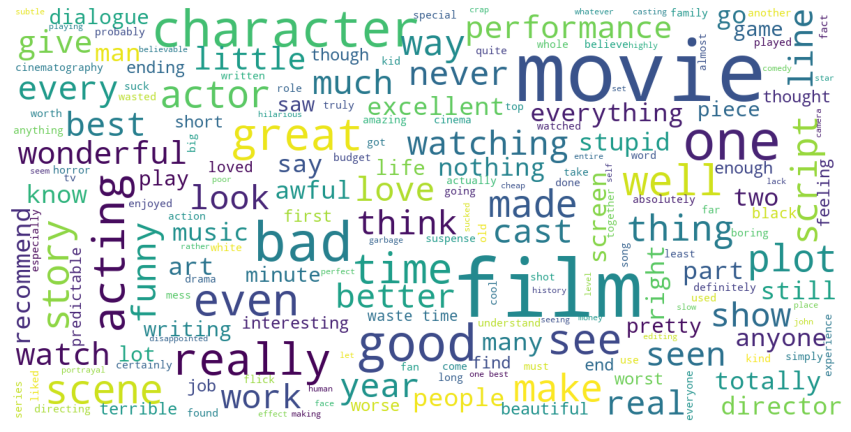

In [38]:
# Extra Word Cloud

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

mpl.rcParams['font.size']=12           
mpl.rcParams['savefig.dpi']=100      
mpl.rcParams['figure.subplot.bottom']=.1 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        regexp=r"\w[a-z]+",
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(y)